# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

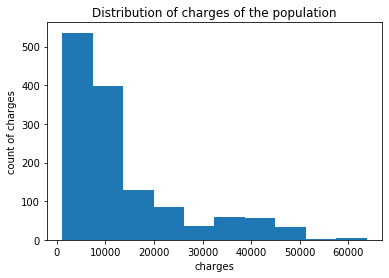

In [7]:
_ = plt.hist(medical.charges, bins=10)
_ = plt.ylabel('count of charges')
_ = plt.xlabel('charges')
_ = plt.title('Distribution of charges of the population')

In [18]:
mean_charges = np.mean(medical.charges)
mean_charges

13270.422265141257

In [19]:
std_charges = np.std(medical.charges,ddof=1)
std_charges

12110.011236693994

In [20]:
def medicalcharges_sampler(n):
    return np.random.choice(medical.charges, n)

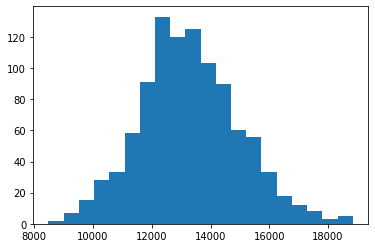

13290.084047900182

In [27]:
sample_mean = np.empty(1000)
for i in range(1000):
    sample_mean[i] = np.mean(medicalcharges_sampler(50))

_ = plt.hist(sample_mean,bins=20)

plt.show()


In [29]:
_mean = np.mean(sample_mean)
_mean

13290.084047900182

The mean from the mean sample disrtibution is 13290.08

In [30]:
𝜎𝑚𝑒𝑎𝑛 = std_charges/(50**0.5)
𝜎𝑚𝑒𝑎𝑛

1712.6142131423223

<div class="span5 alert alert-info">
__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?
</div>    

__A:__The mean of the mean sample distribution is 13290.08 which is the mean population parameter and is higher than 12000 and not fallen.An appropriate confidence interval for the mean could give an idea whether the true mean is within the range or not which will give an idea whether its a concern or not 

<div class="span5 alert alert-info">
__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?
</div>

__A:__

Significance level alpha = 100-95 = 5 

in decimal 0.05/2 = 0.025(two sided)

1-0.025 = 0.975

Critical value = 1.96 from z table

1.96 * 1712.61/(50**0.5) = 474.71

conf interval = 13290.08 - 474.71 to  13290.08 + 474.71

i.e 12815.38 to 13764.78

As the fallen avg charge 12000 does not lies in this range, this is not much a matter of concern.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

<div class="span5 alert alert-info">
__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?
</div>

__A:__
1.Null hypothesis says thats poeple with insurance are not charged different amount than those without. 
2.Alternative hypothesis says that people with insurance are charged different amount than those without. 
3.We assume that the variance of the two groups are identical.

In [4]:
#dividing in twoo groups based on insurance claims
medical_insurance = medical[medical.insuranceclaim == 1]
medical_no_insurance = medical[medical.insuranceclaim == 0]

In [7]:
#getting samples
sample_insurance = medical_insurance.charges
sample_no_insurance = medical_no_insurance.charges

In [9]:
#mean of samples
x0 = np.mean(sample_insurance)
s0 = np.std(sample_insurance)
n0 = len(sample_insurance)

x1 = np.mean(sample_no_insurance)
s1 = np.std(sample_no_insurance)
n1 = len(sample_no_insurance)

print("x0",x0)
print("s0",s0)
print("n0",n0)

print("x1",x1)
print("s1",s1)
print("n1",n1)

x0 16423.928276537663
s0 14036.956250260411
n0 783
x1 8821.421892306294
s1 6440.699841605233
n1 555


Some assumptions:<br>
1.Samples are independent and random.<br>
2.Normally distributed population.<br>
3.Equal group variance.

Calculating common variance 
\begin{equation}
𝜎^2 = {\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}


or 
pooled standard devation 
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}


Calculating t test statistics
\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}



In [15]:
variance = (((n0-1)*(s0**2))+((n1-1)*(s1**2)))/(n0+n1-2)
sp = np.sqrt(variance)

print('variance',variance)
print('pooled standard deviation',sp)

t_statistics = (x0 - x1)/(sp * np.sqrt((1/n0) + (1/n1)))
print('t_statistics',t_statistics)

variance 132532657.551345
pooled standard deviation 11512.282899205744
t_statistics 11.901306943555385


<div class="span5 alert alert-info">
__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.
</div>    

__A:__ 

Degree of freedom for sample size 20 is 19.<br> 
From t distribution,assuming null hypothesis is true we get pvalue from t table we get pvalue to be very small, so we reject the null hypothesis i.e we reject the null hypothesis that the charges of insured and not insured are same.

In [16]:
from scipy import stats

stats.ttest_ind(sample_insurance,sample_no_insurance)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

<div class="span5 alert alert-info">
__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.
</div>    

__A:__ stats.ttest_ind(sample1,sample2, equal_var = False)

<div class="span5 alert alert-info">
__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.
</div>    

__A:__ We dont have similar statistical funtions for z-test because they are performed for larger sample size,so the distribution tends to be normalised and the standard deviation of sample is approx same as population standard deviation. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test